# Analysis the Data

## Load & Read the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_19_clean_complete = pd.read_csv("../DATA/covid_19_clean_complete.csv", sep=',')
covid_19_clean_complete.head(15)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [3]:
covid_19_clean_complete.shape

(49068, 10)

In [4]:
covid_19_clean_complete.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

### convert the columns heading to lower case.

In [5]:
covid_19_clean_complete.columns = [col.strip().lower() for col in covid_19_clean_complete.columns]

In [6]:
covid_19_clean_complete.columns

Index(['province/state', 'country/region', 'lat', 'long', 'date', 'confirmed',
       'deaths', 'recovered', 'active', 'who region'],
      dtype='object')

### replace the columns format

In [7]:
covid_19_clean_complete.columns = [col.replace(' ', '_') for col in covid_19_clean_complete.columns]
covid_19_clean_complete.columns

Index(['province/state', 'country/region', 'lat', 'long', 'date', 'confirmed',
       'deaths', 'recovered', 'active', 'who_region'],
      dtype='object')

### convert the data to lower case.

In [8]:
obj = covid_19_clean_complete.dtypes[covid_19_clean_complete.dtypes == 'object'].index
covid_19_clean_complete[obj] = covid_19_clean_complete[obj].apply(lambda x:x.astype(str).str.lower())
covid_19_clean_complete.head()

,province/state,country/region,lat,long,date,confirmed,deaths,recovered,active,who_region
0,nan,afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,eastern mediterranean
1,nan,albania,41.15330,20.168300,2020-01-22,0,0,0,0,europe
2,nan,algeria,28.03390,1.659600,2020-01-22,0,0,0,0,africa
3,nan,andorra,42.50630,1.521800,2020-01-22,0,0,0,0,europe
4,nan,angola,-11.20270,17.873900,2020-01-22,0,0,0,0,africa


In [9]:
covid_19_clean_complete.dtypes

province/state     object
country/region     object
lat               float64
long              float64
date               object
confirmed           int64
deaths              int64
recovered           int64
active              int64
who_region         object
dtype: object

### get the unique values

In [10]:
for col in covid_19_clean_complete.columns:
    print(f"{col} ---> {len(covid_19_clean_complete[col].unique())}")

province/state ---> 79
country/region ---> 187
lat ---> 260
long ---> 261
date ---> 188
confirmed ---> 10861
deaths ---> 3640
recovered ---> 7609
active ---> 8641
who_region ---> 6


### select the columns

In [11]:
covid_19_clean_complete = covid_19_clean_complete.drop(columns=['lat', 'long'], axis=1)
covid_19_clean_complete.head()

,province/state,country/region,date,confirmed,deaths,recovered,active,who_region
0,nan,afghanistan,2020-01-22,0,0,0,0,eastern mediterranean
1,nan,albania,2020-01-22,0,0,0,0,europe
2,nan,algeria,2020-01-22,0,0,0,0,africa
3,nan,andorra,2020-01-22,0,0,0,0,europe
4,nan,angola,2020-01-22,0,0,0,0,africa


### handle the date column

In [12]:
covid_19_clean_complete['month'] = covid_19_clean_complete['date'].apply(lambda x:x.split('-')[1][-1])
covid_19_clean_complete.head()

,province/state,country/region,date,confirmed,deaths,recovered,active,who_region,month
0,nan,afghanistan,2020-01-22,0,0,0,0,eastern mediterranean,1
1,nan,albania,2020-01-22,0,0,0,0,europe,1
2,nan,algeria,2020-01-22,0,0,0,0,africa,1
3,nan,andorra,2020-01-22,0,0,0,0,europe,1
4,nan,angola,2020-01-22,0,0,0,0,africa,1


In [13]:
covid_19_clean_complete['month'].unique()

array(['1', '2', '3', '4', '5', '6', '7'], dtype=object)

In [14]:
mnt = {'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul'}
covid_19_clean_complete['month'] = covid_19_clean_complete['month'].map(mnt)
covid_19_clean_complete.head()

,province/state,country/region,date,confirmed,deaths,recovered,active,who_region,month
0,nan,afghanistan,2020-01-22,0,0,0,0,eastern mediterranean,Jan
1,nan,albania,2020-01-22,0,0,0,0,europe,Jan
2,nan,algeria,2020-01-22,0,0,0,0,africa,Jan
3,nan,andorra,2020-01-22,0,0,0,0,europe,Jan
4,nan,angola,2020-01-22,0,0,0,0,africa,Jan


In [15]:
covid_19_clean_complete['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'], dtype=object)

### separate the data region wise:
['eastern mediterranean', 'europe', 'africa', 'americas','western pacific', 'south-east asia']

In [16]:
eastern_mediterranean_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'eastern mediterranean']
europe_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'europe']
africa_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'africa']
americas_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'americas']
western_pacific_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'western pacific']
south_east_asia_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'south-east asia']

In [17]:
# WHO Region wise countries:

region_wise_countries = {
                            'eastern_mediterranean_region':eastern_mediterranean_region['country/region'].unique(),
                            "europe_region":europe_region['country/region'].unique(),
                            "africa_region":africa_region['country/region'].unique(),
                            "americas_region":americas_region['country/region'].unique(),
                            "western_pacific_region":western_pacific_region['country/region'].unique(),
                            "south_east_asia_region":south_east_asia_region['country/region'].unique()
}

In [18]:
region_wise_countries

{'eastern_mediterranean_region': array(['afghanistan', 'bahrain', 'djibouti', 'egypt', 'iran', 'iraq',
        'jordan', 'kuwait', 'lebanon', 'morocco', 'oman', 'pakistan',
        'qatar', 'saudi arabia', 'somalia', 'sudan', 'tunisia',
        'united arab emirates', 'syria', 'libya', 'west bank and gaza',
        'yemen'], dtype=object),
 'europe_region': array(['albania', 'andorra', 'armenia', 'austria', 'azerbaijan',
        'belarus', 'belgium', 'bosnia and herzegovina', 'bulgaria',
        'croatia', 'cyprus', 'czechia', 'denmark', 'greenland', 'estonia',
        'finland', 'france', 'georgia', 'germany', 'greece', 'holy see',
        'hungary', 'iceland', 'ireland', 'israel', 'italy', 'kazakhstan',
        'kyrgyzstan', 'latvia', 'liechtenstein', 'lithuania', 'luxembourg',
        'malta', 'moldova', 'monaco', 'montenegro', 'netherlands',
        'north macedonia', 'norway', 'poland', 'portugal', 'romania',
        'russia', 'san marino', 'serbia', 'slovakia', 'slovenia', 'spain

## Perform the analysis based on "WHO Region":

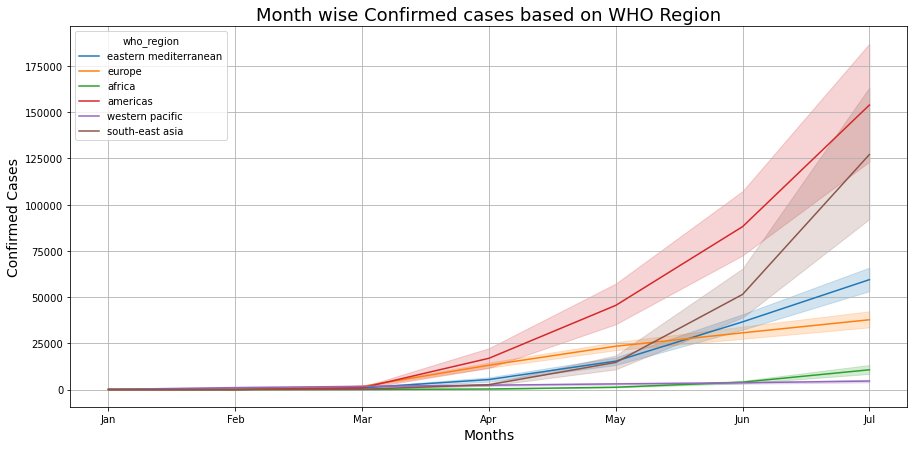

In [19]:
# plot the data: month wise confirmed cases
plt.figure(figsize=(15,7))
plt.grid()
line_plot = sns.lineplot(data=covid_19_clean_complete, x='month', y='confirmed', hue='who_region')
line_plot.set_title("Month wise Confirmed cases based on WHO Region", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Confirmed Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_confirmed_cases_based_on_who_region_linechart.png")
plt.show()

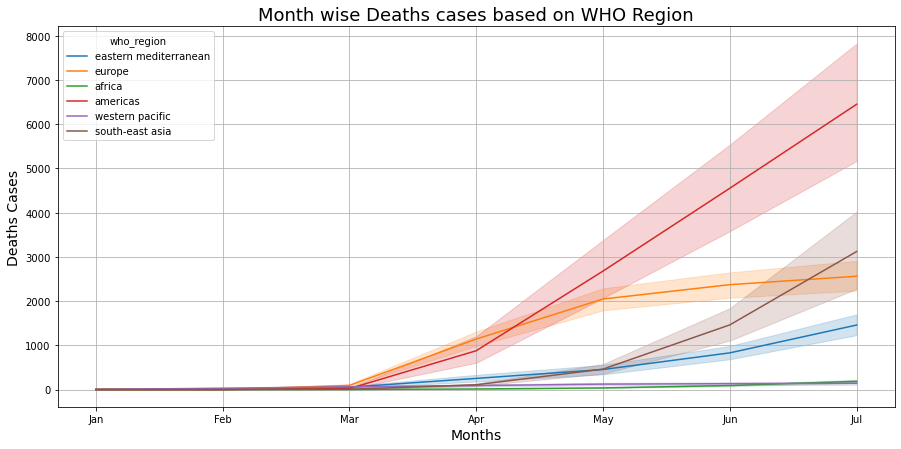

In [20]:
# plot the data: month wise deaths cases

plt.figure(figsize=(15,7))
plt.grid()
line_plot = sns.lineplot(data=covid_19_clean_complete, x='month', y='deaths', hue='who_region')
line_plot.set_title("Month wise Deaths cases based on WHO Region", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Deaths Cases", fontsize=14)
plt.savefig("../Plots or Graphs Pictures/month_wise_death_cases_based_on_who_region_linechart.png")
plt.show()

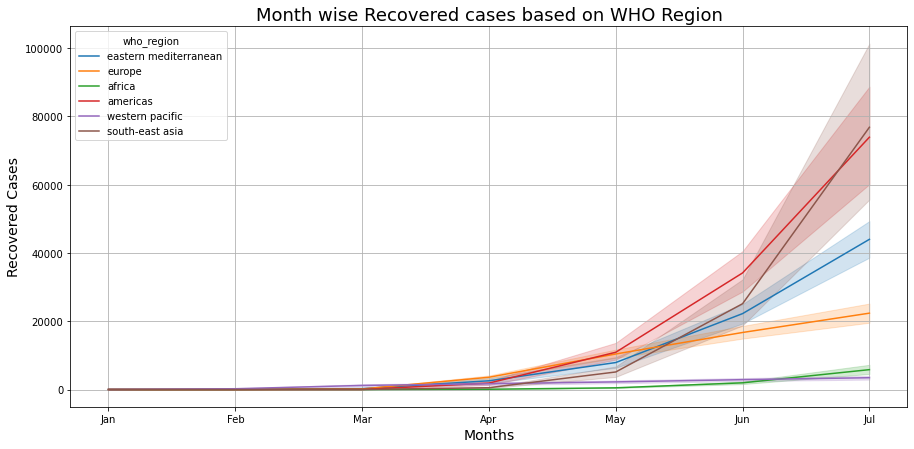

In [21]:
# plot the data: month wise recovered cases

plt.figure(figsize=(15,7))
plt.grid()
line_plot = sns.lineplot(data=covid_19_clean_complete, x='month', y='recovered', hue='who_region')
line_plot.set_title("Month wise Recovered cases based on WHO Region", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Recovered Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_recovered_cases_based_on_who_region_linechart.png")
plt.show()

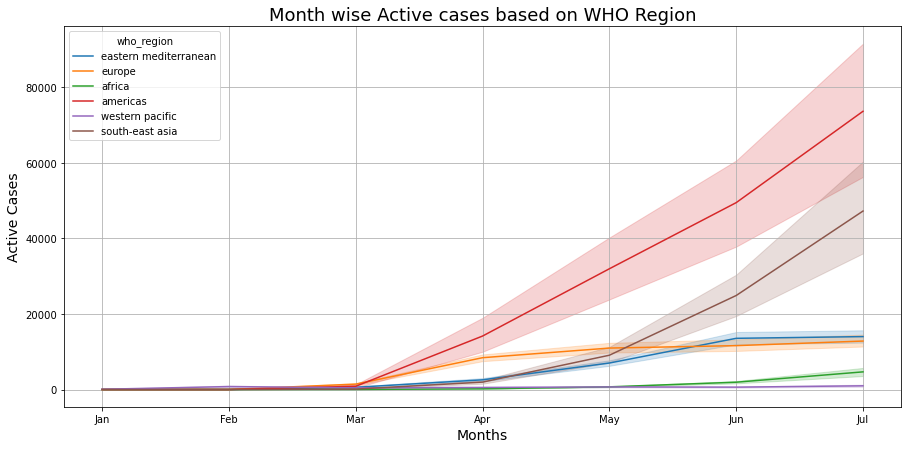

In [22]:
# plot the data: month wise active cases

plt.figure(figsize=(15,7))
plt.grid()
line_plot = sns.lineplot(data=covid_19_clean_complete, x='month', y='active', hue='who_region')
line_plot.set_title("Month wise Active cases based on WHO Region", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Active Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_active_cases_based_on_who_region_linechart.png")
plt.show()

## Separate the data based on India, US, China, UK.

In [23]:
india = covid_19_clean_complete[covid_19_clean_complete['country/region'] == 'india']
# russia = covid_19_clean_complete[covid_19_clean_complete['country/region'] == 'russia']
# france = covid_19_clean_complete[covid_19_clean_complete['country/region'] == 'france']
# australia = covid_19_clean_complete[covid_19_clean_complete['country/region'] == 'australia']
# japan = covid_19_clean_complete[covid_19_clean_complete['country/region'] == 'japan']
us = covid_19_clean_complete[covid_19_clean_complete['country/region'] == 'us']
china = covid_19_clean_complete[covid_19_clean_complete['country/region'] == 'china']
# germany = covid_19_clean_complete[covid_19_clean_complete['country/region'] == 'germany']
uk = covid_19_clean_complete[covid_19_clean_complete['country/region'] == 'united kingdom']


## Total Confirmed, Deaths, Recovered, Active cases in India, China, US, UK¶

In [24]:
total_cases_country_wise = [
    {
        'country': 'India', 
        'total confirmed cases': sorted(india['confirmed'], reverse=True)[0],
        'total death cases': sorted(india['deaths'], reverse=True)[0],
        'total recovered cases': sorted(india['recovered'], reverse=True)[0],
        'total active cases': sorted(india['active'], reverse=True)[0],
    },
    {
        'country': 'US', 
        'total confirmed cases': sorted(us['confirmed'], reverse=True)[0],
        'total death cases': sorted(us['deaths'], reverse=True)[0],
        'total recovered cases': sorted(us['recovered'], reverse=True)[0],
        'total active cases': sorted(us['active'], reverse=True)[0],
    },
    {
        'country': 'China', 
        'total confirmed cases': sorted(china['confirmed'], reverse=True)[0],
        'total death cases': sorted(china['deaths'], reverse=True)[0],
        'total recovered cases': sorted(china['recovered'], reverse=True)[0],
        'total active cases': sorted(china['active'], reverse=True)[0],
    },
    {
        'country': 'United Kinngdom', 
        'total confirmed cases': sorted(uk['confirmed'], reverse=True)[0],
        'total death cases': sorted(uk['deaths'], reverse=True)[0],
        'total recovered cases': sorted(uk['recovered'], reverse=True)[0],
        'total active cases': sorted(uk['active'], reverse=True)[0],
    }
]
total_cases_country_wise = pd.DataFrame(total_cases_country_wise)
total_cases_country_wise

,country,total confirmed cases,total death cases,total recovered cases,total active cases
0,India,1480073,33408,951166,495499
1,US,4290259,148011,1325804,2816444
2,China,68135,4512,64435,50633
3,United Kinngdom,300111,45759,533,254352


## Perform the analysis based on countries that's are India, US, China, UK

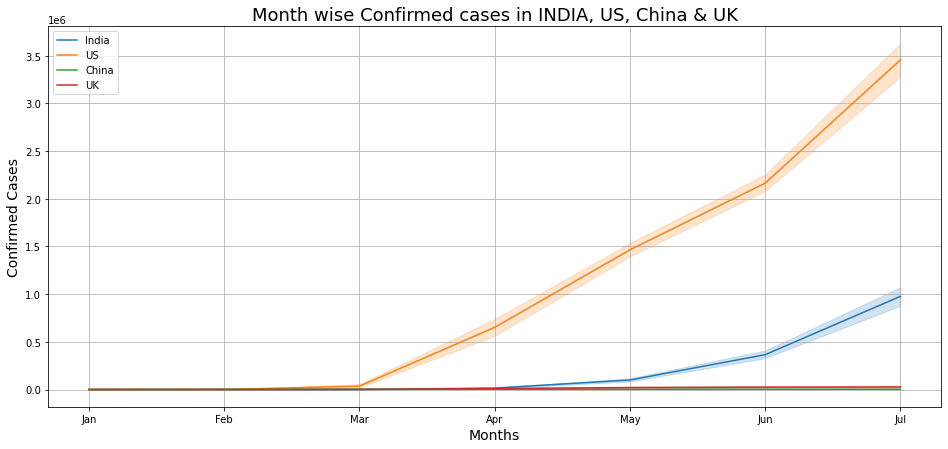

In [25]:
# plot the data: month wise confirmed cases

plt.figure(figsize=(16,7))
plt.grid()
line_plot = sns.lineplot(data=india, x='month', y='confirmed') # India 
sns.lineplot(data=us, x='month', y='confirmed') # US
sns.lineplot(data=china, x='month', y='confirmed') # China
sns.lineplot(data=uk, x='month', y='confirmed') # United Kingdom

plt.legend(['India', 'US', 'China', 'UK'])
line_plot.set_title("Month wise Confirmed cases in INDIA, US, China & UK", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Confirmed Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_confirmed_cases_india_us_china_uk_linechart.png")
plt.show()

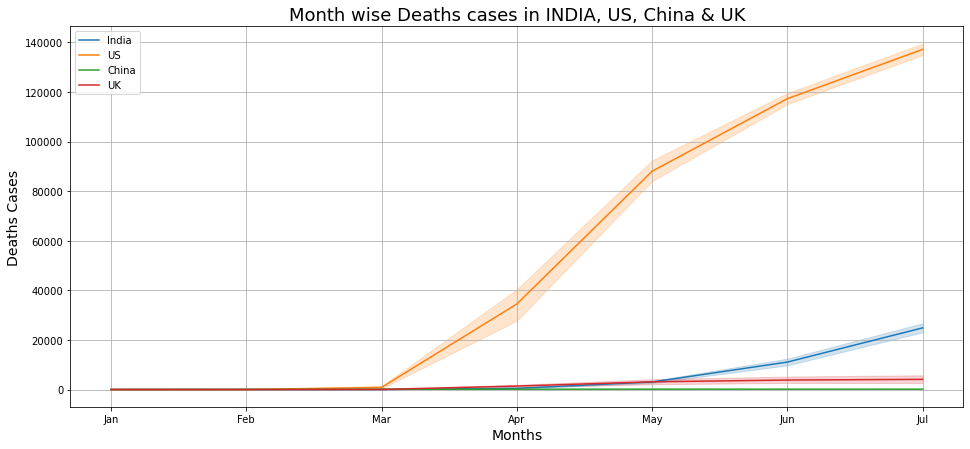

In [26]:
# plot the data: month wise deaths cases

plt.figure(figsize=(16,7))
plt.grid()
line_plot = sns.lineplot(data=india, x='month', y='deaths') # India 
sns.lineplot(data=us, x='month', y='deaths') # US
sns.lineplot(data=china, x='month', y='deaths') # China
sns.lineplot(data=uk, x='month', y='deaths') # United Kingdom

plt.legend(['India', 'US', 'China', 'UK'])
line_plot.set_title("Month wise Deaths cases in INDIA, US, China & UK", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Deaths Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_death_cases_india_us_china_uk_linechart.png")
plt.show()

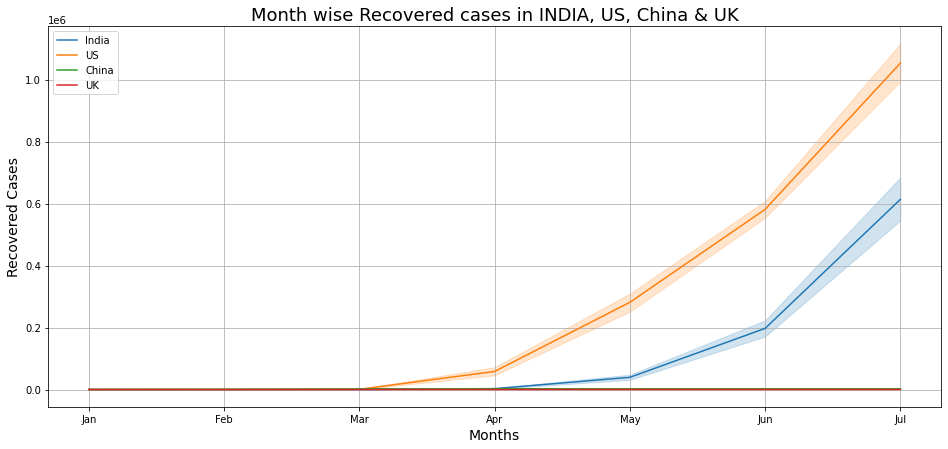

In [27]:
# plot the data: month wise recovered cases

plt.figure(figsize=(16,7))
plt.grid()
line_plot = sns.lineplot(data=india, x='month', y='recovered') # India 
sns.lineplot(data=us, x='month', y='recovered') # US
sns.lineplot(data=china, x='month', y='recovered') # China
sns.lineplot(data=uk, x='month', y='recovered') # United Kingdom

plt.legend(['India', 'US', 'China', 'UK'])
line_plot.set_title("Month wise Recovered cases in INDIA, US, China & UK", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Recovered Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_recovered_cases_india_us_china_uk_linechart.png")
plt.show()

## Total Confirmed, Deaths, Recovered, Active cases in south_east_asia_region country wise:

In [42]:
new_data = south_east_asia_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active']].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()

new_data.sort_values(by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False)[0:5]

,confirmed,deaths,recovered,active
country/region,,,,
india,1480073,33408,951166,495499
bangladesh,226225,2965,125683,97577
indonesia,100303,4838,58173,37292
nepal,18752,48,13754,4950
maldives,3369,15,2547,807


## Total Confirmed, Deaths, Recovered, Active cases in eastern_mediterranean_region country wise:

In [43]:
new_data = eastern_mediterranean_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active']].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()
new_data.sort_values(by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False)[0:5]

,confirmed,deaths,recovered,active
country/region,,,,
iran,293606,15912,255144,22550
pakistan,274289,5842,241026,27421
saudi arabia,268934,2760,222936,43238
iraq,112585,4458,77144,30983
qatar,109597,165,106328,3104


## Total Confirmed, Deaths, Recovered, Active cases in europe_region country wise:

In [44]:
new_data = europe_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active']].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()
new_data.sort_values(by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False)[0:5]

,confirmed,deaths,recovered,active
country/region,,,,
russia,816680,13334,602249,201097
united kingdom,300111,45759,0,254352
spain,272421,28432,150376,93613
italy,246286,35112,198593,12581
turkey,227019,5630,210469,10920


## Total Confirmed, Deaths, Recovered, Active cases in africa_region country wise:

In [45]:
new_data = africa_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active']].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()
new_data.sort_values(by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False)[0:5]

,confirmed,deaths,recovered,active
country/region,,,,
south africa,452529,7067,274925,170537
nigeria,41180,860,18203,22117
ghana,33624,168,29801,3655
algeria,27973,1163,18837,7973
kenya,17975,285,7833,9857


## Total Confirmed, Deaths, Recovered, Active cases in americas_region country wise:

In [46]:
new_data = americas_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active']].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()
new_data.sort_values(by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False)[0:5]

,confirmed,deaths,recovered,active
country/region,,,,
us,4290259,148011,1325804,2816444
brazil,2442375,87618,1846641,508116
mexico,395489,44022,303810,47657
peru,389717,18418,272547,98752
chile,347923,9187,319954,18782


## Total Confirmed, Deaths, Recovered, Active cases in western_pacific_region country wise:

In [47]:
new_data = western_pacific_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active']].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()
new_data.sort_values(by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False)[0:5]

,confirmed,deaths,recovered,active
country/region,,,,
philippines,82040,1945,26446,53649
china,68135,4512,63623,0
singapore,50838,27,45692,5119
japan,31142,998,21970,8174
south korea,14203,300,13007,896


## Perform the analysis based on south_east_asia_region, country wise:

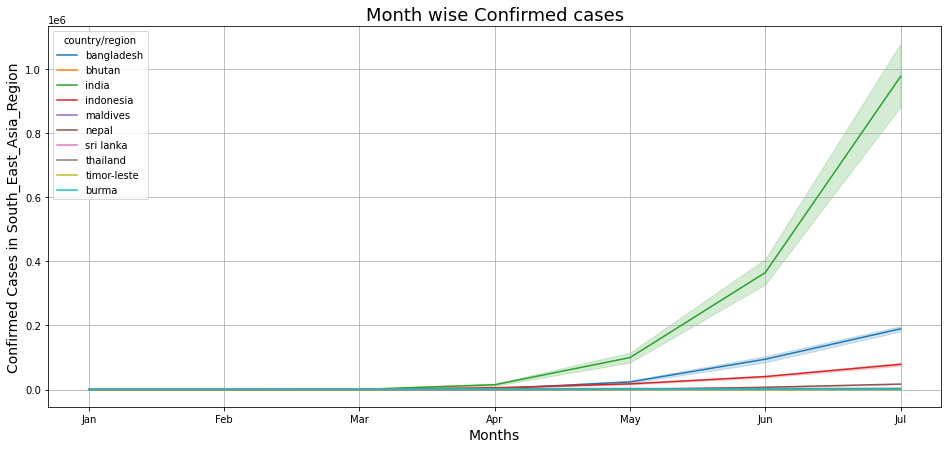

In [29]:
# plot the data: month wise confirmed cases

plt.figure(figsize=(16,7))
plt.grid()
line_plot = sns.lineplot(data=south_east_asia_region, x='month', y='confirmed', hue='country/region')
line_plot.set_title("Month wise Confirmed cases", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Confirmed Cases in South_East_Asia_Region", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_confirmed_cases_south_east_asia_region_linechart.png")
plt.show()

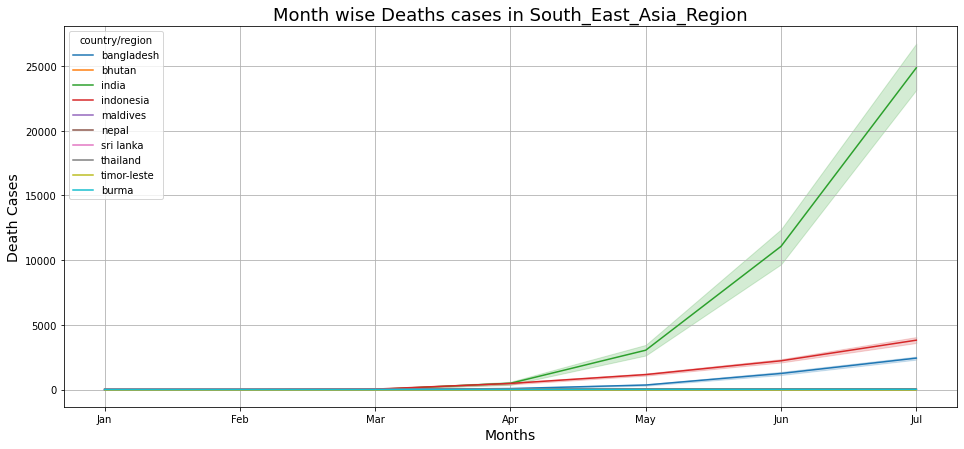

In [30]:
# plot the data: month wise deaths cases

plt.figure(figsize=(16,7))
plt.grid()
line_plot = sns.lineplot(data=south_east_asia_region, x='month', y='deaths', hue='country/region')

line_plot.set_title("Month wise Deaths cases in South_East_Asia_Region", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Death Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_death_cases_south_east_asia_region_linechart.png")
plt.show()

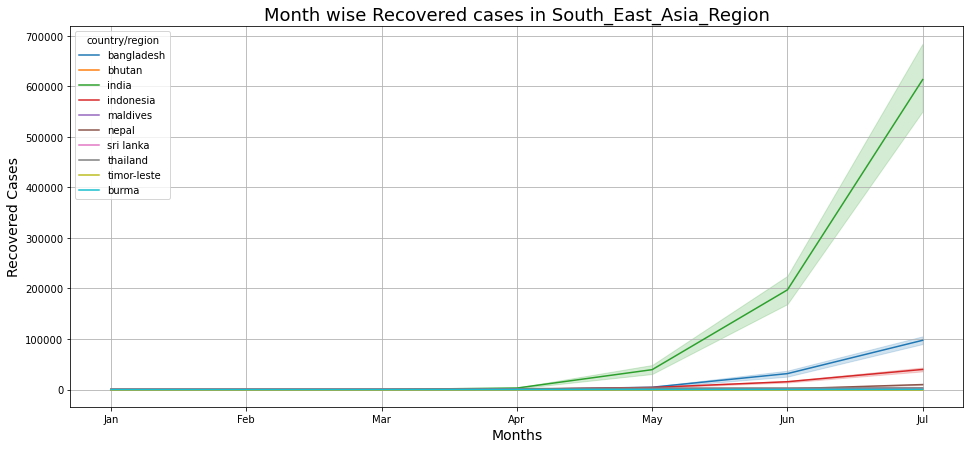

In [31]:
# plot the data: month wise recovered cases

plt.figure(figsize=(16,7))
plt.grid()
line_plot = sns.lineplot(data=south_east_asia_region, x='month', y='recovered', hue='country/region')
line_plot.set_title("Month wise Recovered cases in South_East_Asia_Region", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Recovered Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_recovered_cases_south_east_asia_region_linechart.png")
plt.show()

In [32]:
eastern_mediterranean_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'eastern mediterranean']
europe_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'europe']
africa_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'africa']
americas_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'americas']
western_pacific_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'western pacific']
south_east_asia_region = covid_19_clean_complete[covid_19_clean_complete['who_region'] == 'south-east asia']

In [33]:
# get data from eastern_mediterranean_region:
df1 = eastern_mediterranean_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active',]].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()

# get the data from europe_region
df2 = europe_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active',]].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()

# get the data from americas_region:
df3 = americas_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active',]].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()

# get data from western_pacific_region:
df4 = western_pacific_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active',]].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()

# get data from south_east_asia_region:
df5 = south_east_asia_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active',]].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()

# get the data from africa_region:
df6 = africa_region[['country/region', 'confirmed', 'deaths', 'recovered', 'active',]].sort_values(
    by=['confirmed', 'deaths', 'recovered', 'active'], ascending=False).groupby('country/region').first()

In [34]:
highest_cases_region_wise = [
    {
        "region": "eastern_mediterranean_region",
        'confirmed cases': df1.iloc[np.where(df1['confirmed'] == df1['confirmed'].max())].index[0],
        'deaths cases': df1.iloc[np.where(df1['deaths'] == df1['deaths'].max())].index[0],
        'recovered cases': df1.iloc[np.where(df1['recovered'] == df1['recovered'].max())].index[0],
        'active cases': df1.iloc[np.where(df1['active'] == df1['active'].max())].index[0]
    },
    {
        "region": "europe_region",
        'confirmed cases': df2.iloc[np.where(df2['confirmed'] == df2['confirmed'].max())].index[0],
        'deaths cases': df2.iloc[np.where(df2['deaths'] == df2['deaths'].max())].index[0],
        'recovered cases': df2.iloc[np.where(df2['recovered'] == df2['recovered'].max())].index[0],
        'active cases': df2.iloc[np.where(df2['active'] == df2['active'].max())].index[0]
    },
    {
        "region": "americas_region",
        'confirmed cases': df3.iloc[np.where(df3['confirmed'] == df3['confirmed'].max())].index[0],
        'deaths cases': df3.iloc[np.where(df3['deaths'] == df3['deaths'].max())].index[0],
        'recovered cases': df3.iloc[np.where(df3['recovered'] == df3['recovered'].max())].index[0],
        'active cases': df3.iloc[np.where(df3['active'] == df3['active'].max())].index[0]
    },
    {
        "region": "western_pacific_region",
        'confirmed cases': df4.iloc[np.where(df4['confirmed'] == df4['confirmed'].max())].index[0],
        'deaths cases': df4.iloc[np.where(df4['deaths'] == df4['deaths'].max())].index[0],
        'recovered cases': df4.iloc[np.where(df4['recovered'] == df4['recovered'].max())].index[0],
        'active cases': df4.iloc[np.where(df4['active'] == df4['active'].max())].index[0]
    },
    {
        "region": "south_east_asia_region",
        'confirmed cases': df5.iloc[np.where(df5['confirmed'] == df5['confirmed'].max())].index[0],
        'deaths cases': df5.iloc[np.where(df5['deaths'] == df5['deaths'].max())].index[0],
        'recovered cases': df5.iloc[np.where(df5['recovered'] == df5['recovered'].max())].index[0],
        'active cases': df5.iloc[np.where(df5['active'] == df5['active'].max())].index[0]
    },
    {
        "region": "africa_region",
        'confirmed cases': df6.iloc[np.where(df6['confirmed'] == df6['confirmed'].max())].index[0],
        'deaths cases': df6.iloc[np.where(df6['deaths'] == df6['deaths'].max())].index[0],
        'recovered cases': df6.iloc[np.where(df6['recovered'] == df6['recovered'].max())].index[0],
        'active cases': df6.iloc[np.where(df6['active'] == df6['active'].max())].index[0]
    },
    
]
pd.DataFrame(highest_cases_region_wise)

,region,confirmed cases,deaths cases,recovered cases,active cases
0,eastern_mediterranean_region,iran,iran,iran,egypt
1,europe_region,russia,united kingdom,russia,united kingdom
2,americas_region,us,us,brazil,us
3,western_pacific_region,philippines,china,china,philippines
4,south_east_asia_region,india,india,india,india
5,africa_region,south africa,south africa,south africa,south africa
